In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import kurtosis, skew


In [42]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(2,3):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


In [43]:
############# Separate each participant's time-series into each trial. Remove NaN ###########

In [44]:
#print(len(speed))
print(len(curr_X[0]))

46556


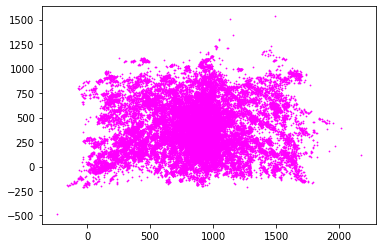

In [45]:
plt.scatter(curr_X, curr_Y,s=0.6,c='magenta')
plt.show()

In [46]:
test = pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [47]:
x_val = test.iloc[:, 39:40].values
y_val = test.iloc[:, 40:41].values
f_type = test.iloc[:, 79:80].values

In [48]:
x_fix = []
y_fix = []

x_sac = []
y_sac = []

t_stamps = test.iloc[:, 0:1].values

#print(t_stamps)

sac_timestamp = []
fix_timestamp = []

leg = int(len(f_type))
print(leg)

for i in range (leg):
    if f_type[i] == 'Fixation':
        x_fix.append(x_val[i])
        y_fix.append(y_val[i])
        fix_timestamp.append(t_stamps[i])
        
    elif f_type[i] == 'Saccade':
        x_sac.append(x_val[i])
        y_sac.append(y_val[i])
        sac_timestamp.append(t_stamps[i])
        
    else:
        pass
    
print("X/Y Fixation Points")

#print(x_fix)
#print(y_fix)

print("X/Y Saccade Points")

#print(x_sac)
#print(y_sac)


        

46556
X/Y Fixation Points
X/Y Saccade Points


Timestamps


<ipython-input-49-e71173c3ee42>:66: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-49-e71173c3ee42>:65: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-49-e71173c3ee42>:70: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


22925
22925
325


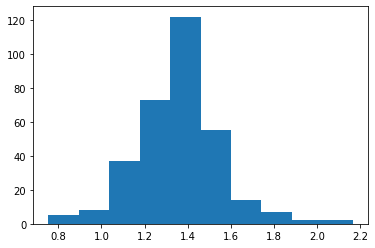

In [49]:
# Feature Duration

print("Timestamps")
#print(fix_timestamp)

fix_duration_diff = []

#Print diff in timestamps for easy feature seperation

for i in range(len(fix_timestamp)-1):
    
    fix_duration_diff.append(fix_timestamp[i+1] - fix_timestamp[i])

#print(fix_duration_diff)
#print(len(fix_duration_diff))

# Feature Displacement

fix_point_disP = []  
x_point_fixLen = []
y_point_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_point_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_point_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_point_disP.append(np.sqrt(x_point_fixLen[i]**2 + y_point_fixLen[i]**2))

#Define boundaries for feature seperation (a certain amount of time needs to pass for a feature to be "ended")

fix_duration_lengths = []
fix_disp_lengths = []

fix_feat_disp = 0 

fix_count = 0
fix_duration_set = 0


fix_disP = []  
x_fixLen = []
y_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_disP.append(np.sqrt(x_fixLen[i]**2 + y_fixLen[i]**2))
    
    
fix_theta_np = []

ang_time_f2 = []

fix_duration_diff_corr = []

for i in range(len(fix_duration_diff)-1):
    vec1 = [np.array(x_fixLen[i]).sum(axis=0), np.array(y_fixLen[i]).sum(axis=0)]
    vec2 = [np.array(x_fixLen[i+1]).sum(axis=0), np.array(y_fixLen[i+1]).sum(axis=0)]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        fix_theta_np.append(math.pi - np.arccos(dot_product))
        ang_time_f2.append(fix_timestamp[i+1]/1000000)
        fix_duration_diff_corr.append(fix_duration_diff)
        
print(len(fix_theta_np))

print(len(fix_duration_diff_corr))

#print(fix_duration_diff)
        
#print(len(fix_duration_diff_corr))

fix_theta_np_avg = 0

fix_feat_theta_avg = []
        
for i in range (len(fix_duration_diff_corr)):
    
    if (fix_duration_diff[i] < 100000):
        fix_count = fix_count + 1
        #count up individual lengths
        
        if (fix_duration_diff[i] < 0):
            pass
        else:
            fix_duration_set = fix_duration_set + fix_duration_diff[i]
            fix_feat_disp = fix_feat_disp + fix_point_disP[i]
            fix_theta_np_avg = fix_theta_np_avg + fix_theta_np[i]
    
        #print(fix_duration_diff[i])
        
    else:
        
        if (fix_count <= 1):
            #discard
            #print(fix_count)
            fix_count = 0 #reset
            fix_duration_set = 0
            fix_feat_disp = 0
            
        else:
            #append
            #print(fix_count)
            fix_duration_lengths.append(fix_duration_set)
            fix_duration_set = 0
            fix_disp_lengths.append(fix_feat_disp)
            fix_feat_theta_avg.append(fix_theta_np_avg/fix_count)
            fix_theta_np_avg = 0
            fix_feat_disp = 0
            fix_count = 0 #reset 
        
print(len(fix_feat_theta_avg))
        
plt.hist(fix_feat_theta_avg)
plt.show()
        
#print(count)
    
#print(len(fix_duration_lengths))

#print(fix_duration_lengths)

#When features "transition" or "end", append total time of that feature (sum of the time differences for each point in a fixation or saccade group)
    #Note: you may have to delete the first summation (deduct first point from itself)
    #A counter will be necessary to "reset" fixations, or omit singular isolated points classified as fixations
    
#Plot hisogram of each list, with their contained feature durations

#print(fix_duration_lengths)

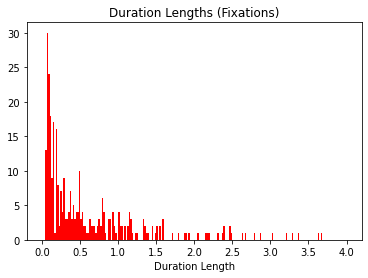

Average Duration: [0.63267633] Seconds
Standard Deviation: 0.7926365197443344
Skewness: 2.558098986894635
Kurtosis: 8.548684775331047


In [50]:
plt.hist(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1),200,range=[0,4],color="red")
plt.xlabel("Duration Length")
plt.title("Duration Lengths (Fixations)")
plt.savefig("Fixation_feat_dur_hist")
plt.show()

f_dur_tot = 0

for j in range (len(fix_duration_lengths)):
    
    if math.isnan(fix_duration_lengths[j]):
        pass
    else:
        f_dur_tot = f_dur_tot + fix_duration_lengths[j]
    
f_dur_avg = f_dur_tot/len(fix_duration_lengths)

print("Average Duration: " + str(f_dur_avg/1000000) + " Seconds")

#calculate also standard deviation, skewness and kurtosis

f_d_sd = np.std(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1))
print("Standard Deviation: " + str(f_d_sd))

f_d_sk = skew(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Skewness: " + str(f_d_sk))

f_d_ku = kurtosis(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Kurtosis: " + str(f_d_ku))

Timestamps


<ipython-input-51-f3fb66c2e698>:61: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-51-f3fb66c2e698>:60: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-51-f3fb66c2e698>:65: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


8867
8867
810


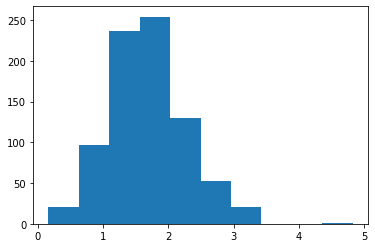

In [51]:
print("Timestamps")
#print(sac_timestamp)

sac_duration_diff = []

for i in range(len(sac_timestamp)-1):
    
    sac_duration_diff.append(sac_timestamp[i+1] - sac_timestamp[i])
    
#print(sac_duration_diff)
#print(len(sac_duration_diff))


sac_point_disP = []  
x_point_sacLen = []
y_point_sacLen = []
    
for i in range(len(x_sac)-1):
    
    x_point_sacLen.append(x_sac[i+1] - x_sac[i])
    
    y_point_sacLen.append(y_sac[i+1] - y_sac[i])
        
    sac_point_disP.append(np.sqrt(x_point_sacLen[i]**2 + y_point_sacLen[i]**2))



sac_duration_lengths = []
sac_disp_lengths = []

sac_feat_disp = 0 

sac_count = 0
sac_duration_set = 0


sac_disP = []  
x_sacLen = []
y_sacLen = []
    
for i in range(len(x_sac)-1):
    
    x_sacLen.append(x_sac[i+1] - x_sac[i])
    
    y_sacLen.append(y_sac[i+1] - y_sac[i])
        
    sac_disP.append(np.sqrt(x_sacLen[i]**2 + y_sacLen[i]**2))
    
    
sac_theta_np = []

ang_time_s2 = []

sac_duration_diff_corr = []

for i in range(len(sac_duration_diff)-1):
    vec1 = [np.array(x_sacLen[i]).sum(axis=0), np.array(y_sacLen[i]).sum(axis=0)]
    vec2 = [np.array(x_sacLen[i+1]).sum(axis=0), np.array(y_sacLen[i+1]).sum(axis=0)]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        sac_theta_np.append(math.pi - np.arccos(dot_product))
        ang_time_f2.append(sac_timestamp[i+1]/1000000)
        sac_duration_diff_corr.append(sac_duration_diff)
        
print(len(sac_theta_np))

print(len(sac_duration_diff_corr))

#print(fix_duration_diff)
        
#print(len(fix_duration_diff_corr))

sac_theta_np_avg = 0

sac_feat_theta_avg = []
        
for i in range (len(sac_duration_diff_corr)):
    
    if (sac_duration_diff[i] < 100000):
        sac_count = sac_count + 1
        #count up individual lengths
        
        if (sac_duration_diff[i] < 0):
            pass
        else:
            sac_duration_set = sac_duration_set + sac_duration_diff[i]
            sac_feat_disp = sac_feat_disp + sac_point_disP[i]
            sac_theta_np_avg = sac_theta_np_avg + sac_theta_np[i]
    
        #print(fix_duration_diff[i])
        
    else:
        
        if (sac_count <= 1):
            #discard
            #print(fix_count)
            sac_count = 0 #reset
            sac_duration_set = 0
            sac_feat_disp = 0
            
        else:
            #append
            #print(fix_count)
            sac_duration_lengths.append(sac_duration_set)
            sac_duration_set = 0
            sac_disp_lengths.append(sac_feat_disp)
            sac_feat_theta_avg.append(sac_theta_np_avg/sac_count)
            sac_theta_np_avg = 0
            sac_feat_disp = 0
            sac_count = 0 #reset 
        
print(len(sac_feat_theta_avg))
        
plt.hist(sac_feat_theta_avg)
plt.show() 


#print(len(sac_duration_lengths))            

#print(sac_duration_lengths)

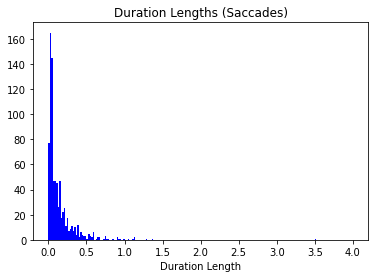

Average Duration: [0.1438567] Seconds
Standard Deviation: 0.21550488237680626
Skewness: 6.374408553569573
Kurtosis: 77.09673845633037


In [52]:
plt.hist(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1),200,range=[0,4],color="blue")
plt.xlabel("Duration Length")
plt.title("Duration Lengths (Saccades)")
plt.savefig("Saccades_feat_dur_hist")
plt.show()

s_dur_tot = 0

for j in range (len(sac_duration_lengths)):
    
    if math.isnan(sac_duration_lengths[j]):
        pass
    else:
        s_dur_tot = s_dur_tot + sac_duration_lengths[j]
    
s_dur_avg = s_dur_tot/len(sac_duration_lengths)

print("Average Duration: " + str(s_dur_avg/1000000) + " Seconds")
#calculate also standard deviation, skewness and kurtosis

s_d_sd = np.std(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1))
print("Standard Deviation: " + str(s_d_sd))

s_d_sk = skew(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Skewness: " + str(s_d_sk))

s_d_ku = kurtosis(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1)) #(... ,bias=False)
print("Kurtosis: " + str(s_d_ku))

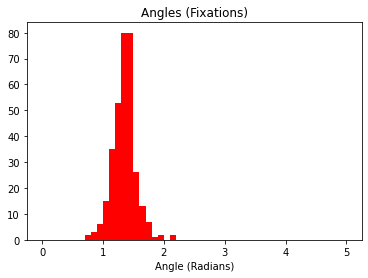

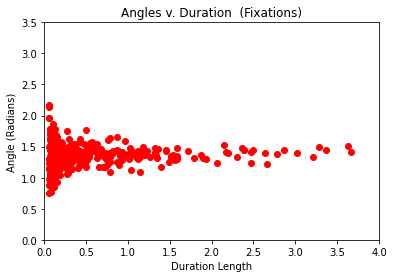

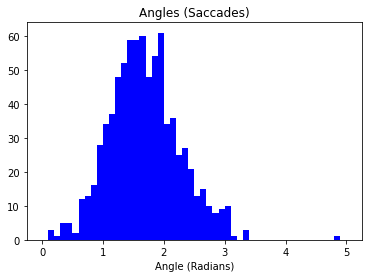

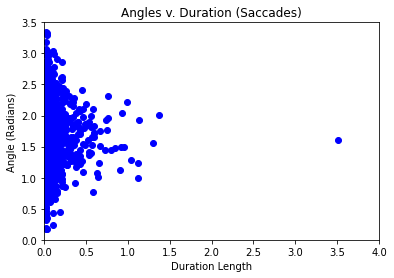

In [53]:
plt.hist(fix_feat_theta_avg,bins=50,color="red",range=[0,5])
plt.title("Angles (Fixations)")
plt.xlabel("Angle (Radians)")
plt.savefig("fixations_feat_ang_hist")
plt.show()

plt.scatter(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1),fix_feat_theta_avg, c = 'red')
plt.ylim(0,3.5)
plt.xlim(0,4)
plt.xlabel("Duration Length")
plt.ylabel("Angle (Radians)")
plt.title("Angles v. Duration  (Fixations)")
plt.savefig("fixations_feat_ang")
plt.show()



plt.hist(sac_feat_theta_avg,bins=50,color="blue",range=[0,5])
plt.title("Angles (Saccades)")
plt.xlabel("Angle (Radians)")
plt.savefig("saccades_feat_ang_hist")
plt.show()

plt.scatter(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1),sac_feat_theta_avg, c = 'blue')
plt.ylim(0,3.5)
plt.xlim(0,4)
plt.xlabel("Duration Length")
plt.ylabel("Angle (Radians)")
plt.title("Angles v. Duration (Saccades)")
plt.savefig("saccades_feat_ang")
plt.show()

In [54]:
def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

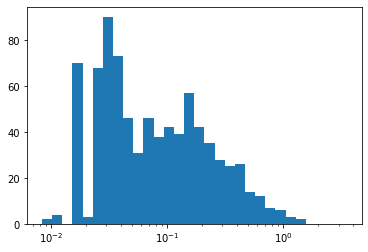

In [55]:
plot_loghist((np.array(sac_duration_lengths)/1000000).sum(axis=1),30)

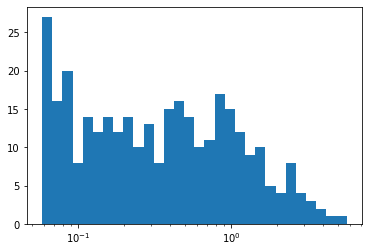

In [56]:
plot_loghist((np.array(fix_duration_lengths)/1000000).sum(axis=1),30)

In [57]:
print(len(sac_duration_lengths))
print(len(sac_disp_lengths))

#Write velocity algo with these instead

810
810


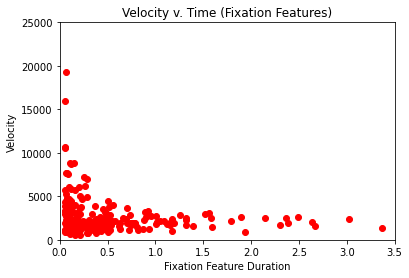

In [58]:
    
fix_feat_velo = []
    
for i in range(len(fix_disp_lengths)):
        
    fix_feat_velo.append(fix_disp_lengths[i]/(fix_duration_lengths[i]/1000000))


plt.scatter(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1),fix_feat_velo, c = 'red')
plt.xlabel("Fixation Feature Duration")
plt.ylim(0, 25000)
plt.xlim(0, 3.5)
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Fixation Features)")
plt.savefig("Fixations_feat_velo")
plt.show()


In [59]:
#there are points missing here, it seems. --not clear why--

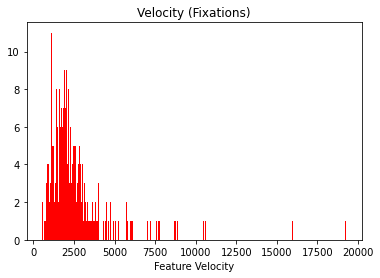

In [60]:
plt.hist(np.array(fix_feat_velo).sum(axis=1),300,color="red")
plt.xlabel("Feature Velocity")
plt.title("Velocity (Fixations)")
#plt.savefig("Fixations_feat_velo_hist")
plt.show()

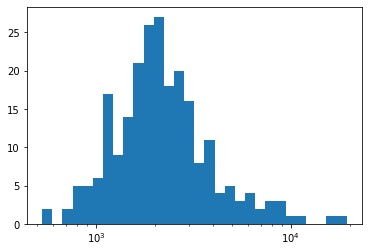

In [61]:
plot_loghist(np.array(fix_feat_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(fix_feat_velo).sum(axis=1)))],30)

In [62]:
#nothing relevant to see here

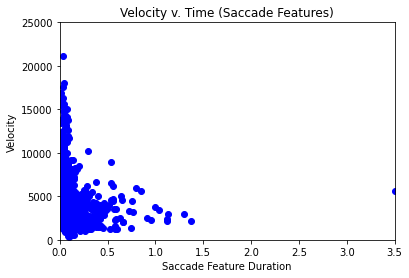

In [63]:
sac_feat_velo = []
    
for i in range(len(sac_disp_lengths)):
        
    sac_feat_velo.append(sac_disp_lengths[i]/(sac_duration_lengths[i]/1000000))


plt.scatter(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1),sac_feat_velo, c = 'blue')
plt.xlabel("Saccade Feature Duration")
plt.ylim(0, 25000)
plt.xlim(0, 3.5)
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Saccade Features)")
plt.savefig("Saccades_feat_velo")
plt.show()

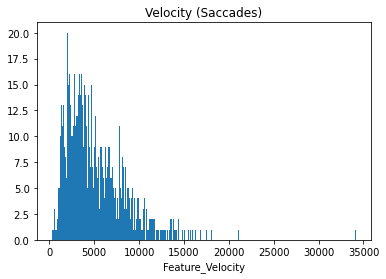

In [64]:
plt.hist(np.array(sac_feat_velo).sum(axis=1),300)
plt.xlabel("Feature_Velocity")
plt.title("Velocity (Saccades)")
#plt.savefig("Saccades_feat_velo_hist")
plt.show()

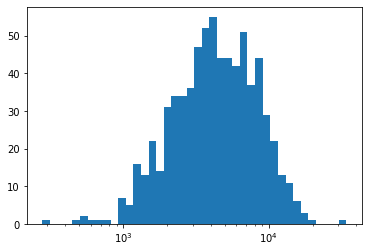

In [65]:
plot_loghist(np.array(sac_feat_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(sac_feat_velo).sum(axis=1)))],40)

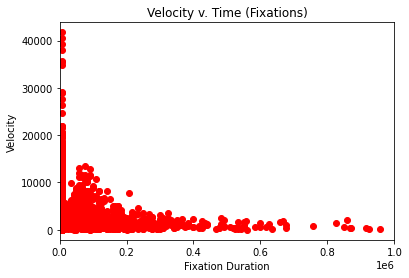

In [66]:
#Displacement

fix_disP = []  
x_fixLen = []
y_fixLen = []
    
for i in range(len(x_fix)-1):
    
    x_fixLen.append(x_fix[i+1] - x_fix[i])
    
    y_fixLen.append(y_fix[i+1] - y_fix[i])
        
    fix_disP.append(np.sqrt(x_fixLen[i]**2 + y_fixLen[i]**2))
    
    
#Velocity

fix_time_delta = []
    
fix_velo = []
    
for i in range(len(fix_timestamp)-1):
    
    fix_time_delta.append(fix_timestamp[i+1] - fix_timestamp[i])
        
    fix_velo.append(fix_disP[i]/(fix_time_delta[i]/1000000))


plt.scatter(fix_time_delta,fix_velo, c = 'red')
plt.xlabel("Fixation Duration")
plt.xlim(0, 1000000)
#plt.ylim(0, 0.07)
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Fixations)")
#plt.savefig("Fixations_velo")
plt.show()


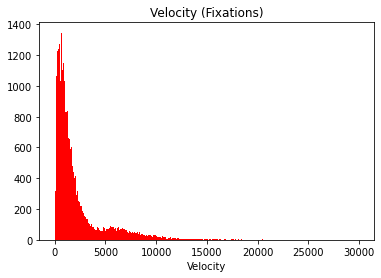

Standard Deviation: 2921.7197944455547
Skewness: 0.004793718051918759
Kurtosis: 10.246124387640068


In [67]:
plt.hist(np.array(fix_velo).sum(axis=1),300,color="red",range=[0,30000])
plt.xlabel("Velocity")
plt.title("Velocity (Fixations)")
#plt.savefig("Fixations_velo_hist")
plt.show()


f_v_sd = np.std(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))]))
print("Standard Deviation: " + str(f_v_sd))

f_v_sk = skew(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))])) #(... ,bias=False)
print("Skewness: " + str(f_v_sk))

f_v_ku = kurtosis(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))])) #(... ,bias=False)
print("Kurtosis: " + str(f_v_ku))

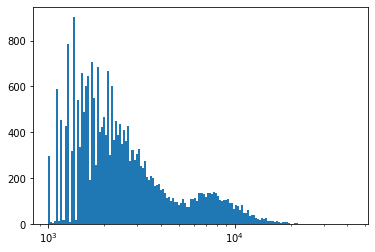

In [68]:
plot_loghist(np.abs(np.array(fix_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(fix_velo).sum(axis=1)))])+1000, bins=150)

In [69]:
#is this an indications that velocity based algorithms would be useful here

In [70]:
#bins[0]

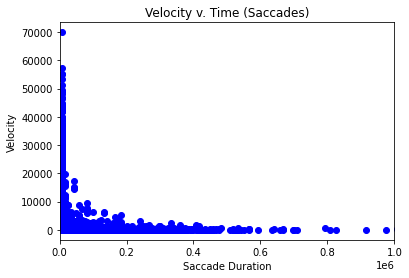

In [71]:
#Displacement

sac_disP = []  
x_sacLen = []
y_sacLen = []
    
for i in range(len(x_sac)-1):
    
    x_sacLen.append(x_sac[i+1] - x_sac[i])
    
    y_sacLen.append(y_sac[i+1] - y_sac[i])
        
    sac_disP.append(np.sqrt(x_sacLen[i]**2 + y_sacLen[i]**2))

    
#Velocity

sac_time_delta = []
    
sac_velo = []
    
for i in range(len(sac_timestamp)-1):
    
    sac_time_delta.append(sac_timestamp[i+1] - sac_timestamp[i])
        
    sac_velo.append(sac_disP[i]/(sac_time_delta[i]/1000000))


plt.scatter(sac_time_delta,sac_velo, c = 'blue')
plt.xlim(0, 1000000)
#plt.ylim(1, 0.01)
plt.xlabel("Saccade Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Time (Saccades)")
#plt.savefig("Saccades_velo")
plt.show()


In [72]:
print(len(sac_velo))
sac_timestamp.pop(0)
print(len(sac_timestamp))

9970
9970


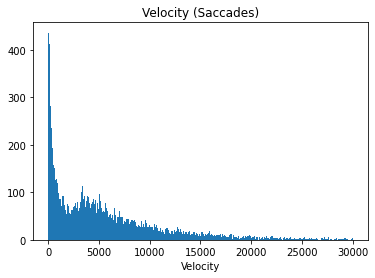

Standard Deviation: 7821.842029298082
Skewness: -0.0711165790563282
Kurtosis: 4.317204373940604


In [73]:
plt.hist(np.array(sac_velo).sum(axis=1),300,range=[0,30000])
plt.xlabel("Velocity")
plt.title("Velocity (Saccades)")
#plt.savefig("Saccades_velo_hist")
plt.show()


s_v_sd = np.std(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))]))
print("Standard Deviation: " + str(s_v_sd))

s_v_sk = skew(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))])) #(... ,bias=False)
print("Skewness: " + str(s_v_sk))

s_v_ku = kurtosis(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))])) #(... ,bias=False)
print("Kurtosis: " + str(s_v_ku))

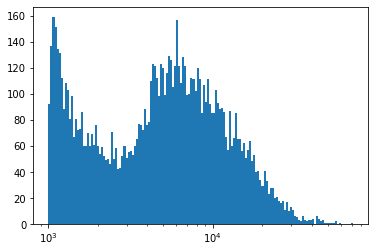

In [74]:
plot_loghist(np.abs(np.array(sac_velo).sum(axis=1)[np.logical_not(np.isnan(np.array(sac_velo).sum(axis=1)))])+1000, bins=150)

In [75]:
print(len(fix_velo))
fix_timestamp.pop(0)
print(len(fix_timestamp))

26703
26703


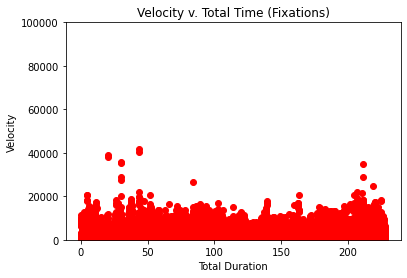

Average Velocity: [1986.05125866]


In [76]:
plt.scatter(np.array(np.array(fix_timestamp)/1000000).sum(axis=1),fix_velo, c = 'red')
plt.ylim(0, 100000)
plt.xlabel("Total Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Total Time (Fixations)")
#plt.savefig("Fixations_velo_tottime")
plt.show()

f_velo_tot = 0

for j in range (len(fix_velo)):
    
    if math.isnan(fix_velo[j]):
        pass
    else:
        f_velo_tot = f_velo_tot + fix_velo[j]
    
f_velo_avg = f_velo_tot/len(fix_velo)

print("Average Velocity: " + str(f_velo_avg))

In [77]:
print(len(fix_velo))
#sac_timestamp.pop(0)
print(len(fix_timestamp))

26703
26703


In [78]:
print(len(sac_timestamp))
print(len(sac_velo))

9970
9970


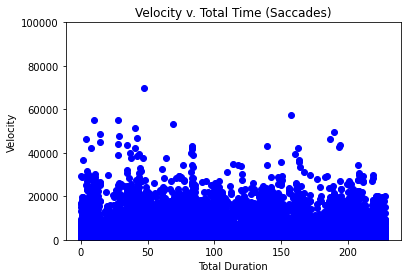

Average Velocity: [5365.77748468]


In [79]:
plt.scatter(np.array(np.array(sac_timestamp)/1000000).sum(axis=1),sac_velo, c = 'blue')
#plt.xlim(0, 20000)
plt.ylim(0, 100000)
plt.xlabel("Total Duration")
plt.ylabel("Velocity")
plt.title("Velocity v. Total Time (Saccades)")
#plt.savefig("Saccades_velo_tottime")
plt.show()

s_velo_tot = 0

for j in range (len(sac_velo)):
    
    if math.isnan(sac_velo[j]):
        pass
    else:
        s_velo_tot = s_velo_tot + sac_velo[j]
    
s_velo_avg = s_velo_tot/len(sac_velo)

print("Average Velocity: " + str(s_velo_avg))

325
325
324


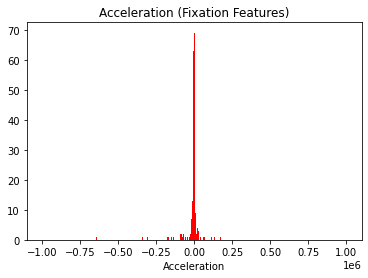

Standard Deviation: 68995776.52221029
Skewness: -0.0016090300417037462
Kurtosis: 52.39044628716439


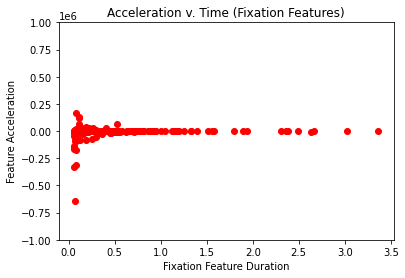

In [80]:
print(len(fix_feat_velo))
print(len(fix_duration_lengths))

#Accelerattion
    
fix_feat_accel = []

fa_timestamp = []

fix_velo_delta = []

fa_timestamp_new = []

for i in range(len(fix_duration_lengths)-1):
    
    fa_timestamp.append((fix_duration_lengths[i+1]/1000000) - (fix_duration_lengths[i]/1000000))
    
    
for i in range(len(fix_feat_velo)-1):
        
    fix_velo_delta.append(fix_feat_velo[i+1] - fix_feat_velo[i])
    
    if (fix_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        fix_feat_accel.append(fix_velo_delta[i]/fa_timestamp[i]) # change fix_disP by time
        fa_timestamp_new.append(fix_duration_lengths[i])
    

print(len(fix_feat_accel))

plt.hist(np.array(np.array(fix_feat_accel)).sum(axis=1),300,range=[-1000000,1000000],color="red")
plt.xlabel("Acceleration")
plt.title("Acceleration (Fixation Features)")
plt.savefig("Fixations_feat_accel_hist_v2")
plt.show()

#fix
f_a_sd = np.std(np.diff(np.hstack(fix_feat_accel)[np.logical_not(np.isnan(np.array(np.hstack(fix_feat_accel))))]))
print("Standard Deviation: " + str(f_a_sd))

f_a_sk = skew(np.diff(np.hstack(fix_feat_accel)[np.logical_not(np.isnan(np.array(np.hstack(fix_feat_accel))))])) #(... ,bias=False)
print("Skewness: " + str(f_a_sk))

f_a_ku = kurtosis(np.diff(np.hstack(fix_feat_accel)[np.logical_not(np.isnan(np.array(np.hstack(fix_feat_accel))))])) #(... ,bias=False)
print("Kurtosis: " + str(f_a_ku))

fix_duration_lengths.pop(0)

plt.scatter(np.array(np.array(fix_duration_lengths)/1000000).sum(axis=1),np.array(np.array(fix_feat_accel)).sum(axis=1), c = 'red')
plt.xlabel("Fixation Feature Duration")
#plt.xlim(0, 1000000)
plt.ylim(-1000000, 1000000)
plt.ylabel("Feature Acceleration")
plt.title("Acceleration v. Time (Fixation Features)")
plt.savefig("Fixations_feat_accel")
plt.show()

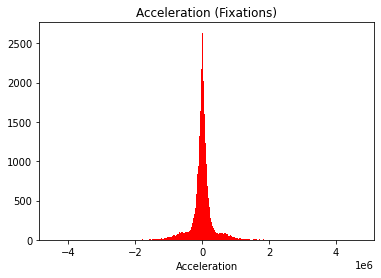

Standard Deviation: 545581.8571493388
Skewness: 0.44213719235007704
Kurtosis: 8.599687466886643


In [81]:
#Accelerattion
    
fix_accel = []

fa_timestamp = []

fix_velo_delta = []

fa_timestamp_new = []

for i in range(len(fix_timestamp)-1):
    
    fa_timestamp.append((fix_timestamp[i+1]/1000000) - (fix_timestamp[i]/1000000))
    
    
for i in range(len(fix_velo)-1):
        
    fix_velo_delta.append(fix_velo[i+1] - fix_velo[i])
    
    if (fix_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        fix_accel.append(fix_velo_delta[i]/fa_timestamp[i]) # change fix_disP by time
        fa_timestamp_new.append(fix_timestamp[i])
    

#print(fix_accel)

plt.hist(np.array(np.array(fix_accel)).sum(axis=1),300,color="red")
plt.xlabel("Acceleration")
plt.title("Acceleration (Fixations)")
#plt.savefig("Fixations_accel_hist_v2")
plt.show()

#fix
f_a_sd = np.std(np.diff(np.hstack(fix_accel)[np.logical_not(np.isnan(np.array(np.hstack(fix_accel))))]))
print("Standard Deviation: " + str(f_a_sd))

f_a_sk = skew(np.diff(np.hstack(fix_accel)[np.logical_not(np.isnan(np.array(np.hstack(fix_accel))))])) #(... ,bias=False)
print("Skewness: " + str(f_a_sk))

f_a_ku = kurtosis(np.diff(np.hstack(fix_accel)[np.logical_not(np.isnan(np.array(np.hstack(fix_accel))))])) #(... ,bias=False)
print("Kurtosis: " + str(f_a_ku))

In [82]:
fix_velo[0] - fix_velo[10]

array([-7052.11222287])

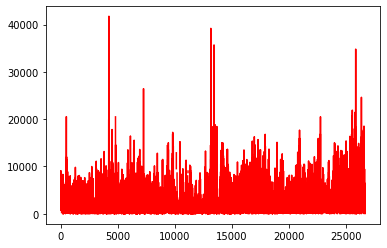

In [83]:
plt.plot(fix_velo,color="red")
a = np.diff(fix_velo)

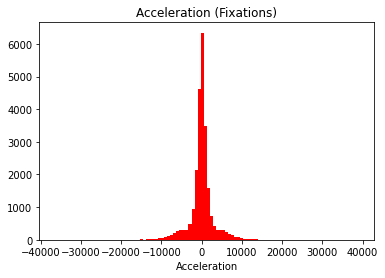

In [84]:
c = plt.hist(np.diff(np.hstack(fix_velo)[np.logical_not(np.isnan(np.array(np.hstack(fix_velo))))]),100,color="red")
plt.xlabel("Acceleration")
plt.title("Acceleration (Fixations)")
#plt.savefig("Fixations_alt_accel_hist_v2")
plt.show()
#divide by time



In [85]:
#Run this first

#fix_timestamp.pop(-1)
print(len(fa_timestamp_new))
print(len(fix_accel))

26695
26695


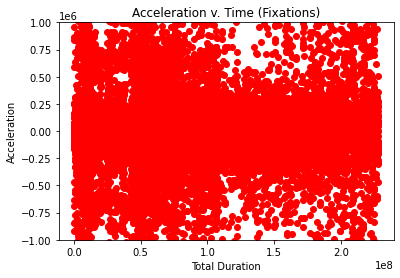

Average Acceleration: [-752.57124661]


In [86]:
plt.scatter(fa_timestamp_new,fix_accel, c = 'red')
#plt.xlim(0, 20000)
plt.ylim(-1000000, 1000000)
plt.xlabel("Total Duration")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Time (Fixations)")
#plt.savefig("Fixations_accel_v3")
plt.show()

f_accel_tot = 0

for j in range (len(fix_accel)):
    
    if math.isnan(fix_accel[j]):
        pass
    else:
        f_accel_tot = f_accel_tot + fix_accel[j]
    
f_accel_avg = f_accel_tot/len(fix_accel)

print("Average Acceleration: " + str(f_accel_avg))

In [88]:
#print(len(fix_feat_velo))
#print(len(fix_duration_lengths))

#Accelerattion
    
sac_feat_accel = []

sa_timestamp = []

sac_velo_delta = []

sa_timestamp_new = []

for i in range(len(sac_duration_lengths)-1):
    
    sa_timestamp.append((sac_duration_lengths[i+1]/1000000) - (sac_duration_lengths[i]/1000000))
    
    
for i in range(len(sac_feat_velo)-1):
        
    sac_velo_delta.append(sac_feat_velo[i+1] - sac_feat_velo[i])
    
    if (sac_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        sac_feat_accel.append(sac_velo_delta[i]/sa_timestamp[i]) # change fix_disP by time
        sa_timestamp_new.append(sac_duration_lengths[i])
    

#print(len(sac_accel))

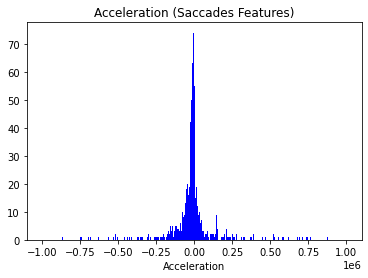

Standard Deviation: 252173586.39674714
Skewness: 0.2806204568974265
Kurtosis: 114.58192394363824


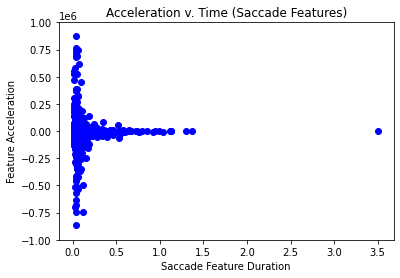

In [89]:
plt.hist(np.array(np.array(sac_feat_accel)).sum(axis=1),300,range=[-1000000,1000000],color="blue")
plt.xlabel("Acceleration")
plt.title("Acceleration (Saccades Features)")
plt.savefig("Saccades_feat_accel_hist_v2")
plt.show()

#fix
f_a_sd = np.std(np.diff(np.hstack(sac_feat_accel)[np.logical_not(np.isnan(np.array(np.hstack(sac_feat_accel))))]))
print("Standard Deviation: " + str(f_a_sd))

f_a_sk = skew(np.diff(np.hstack(sac_feat_accel)[np.logical_not(np.isnan(np.array(np.hstack(sac_feat_accel))))])) #(... ,bias=False)
print("Skewness: " + str(f_a_sk))

f_a_ku = kurtosis(np.diff(np.hstack(sac_feat_accel)[np.logical_not(np.isnan(np.array(np.hstack(sac_feat_accel))))])) #(... ,bias=False)
print("Kurtosis: " + str(f_a_ku))

sac_duration_lengths.pop(0)

plt.scatter(np.array(np.array(sac_duration_lengths)/1000000).sum(axis=1),np.array(np.array(sac_feat_accel)).sum(axis=1), c = 'blue')
plt.xlabel("Saccade Feature Duration")
#plt.xlim(0, 1000000)
plt.ylim(-1000000, 1000000)
plt.ylabel("Feature Acceleration")
plt.title("Acceleration v. Time (Saccade Features)")
plt.savefig("Saccades_feat_accel")
plt.show()

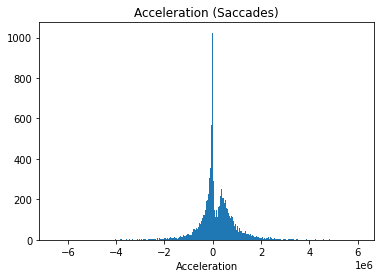

Standard Deviation: 1340659.0465929613
Skewness: -0.8236775640125975
Kurtosis: 6.533875344456133


In [66]:
#Accelerattion
    
sac_accel = []

sa_timestamp = []

sac_velo_delta = []

sa_timestamp_new = []


for i in range(len(sac_timestamp)-1):
    
    sa_timestamp.append((sac_timestamp[i+1]/1000000) - (sac_timestamp[i]/1000000))

    
for i in range(len(sac_velo)-1):
        
    sac_velo_delta.append(sac_velo[i+1] - sac_velo[i])
    
    if (sac_velo_delta[i] == 0): #Divide by zero is not possible
        pass
    
    else:
        sac_accel.append(sac_velo_delta[i]/sa_timestamp[i]) # change fix_disP by time
        sa_timestamp_new.append(sa_timestamp[i])
            


plt.hist(np.array(np.array(sac_accel)).sum(axis=1),300)
plt.xlabel("Acceleration")
plt.title("Acceleration (Saccades)")
plt.savefig("Saccades_accel_hist_v3")
plt.show()

s_a_sd = np.std(np.diff(np.hstack(sac_accel)[np.logical_not(np.isnan(np.array(np.hstack(sac_accel))))]))
print("Standard Deviation: " + str(s_a_sd))

s_a_sk = skew(np.diff(np.hstack(sac_accel)[np.logical_not(np.isnan(np.array(np.hstack(sac_accel))))])) #(... ,bias=False)
print("Skewness: " + str(s_a_sk))

s_a_ku = kurtosis(np.diff(np.hstack(sac_accel)[np.logical_not(np.isnan(np.array(np.hstack(sac_accel))))])) #(... ,bias=False)
print("Kurtosis: " + str(s_a_ku))

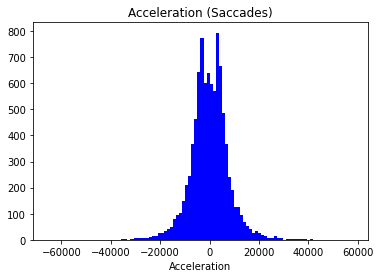

In [67]:
c = plt.hist(np.diff(np.hstack(sac_velo)[np.logical_not(np.isnan(np.array(np.hstack(sac_velo))))]),100,color="blue")
plt.xlabel("Acceleration")
plt.title("Acceleration (Saccades)")
plt.savefig("Saccades_alt_accel_hist_v3")
plt.show()
#divide by time

In [68]:
#Run this first

sac_timestamp.pop(-1)
print(len(sac_timestamp))
print(len(sac_accel))

9969
9969


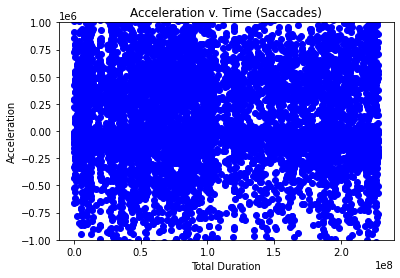

Average Acceleration: [134862.30430447]


In [69]:
plt.scatter(sac_timestamp,sac_accel, c = 'blue')
#plt.xlim(0, 20000)
plt.ylim(-1000000, 1000000)
plt.xlabel("Total Duration")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Time (Saccades)")
plt.savefig("Saccades_accel_v3")
plt.show()

s_accel_tot = 0

for j in range (len(sac_accel)):
    
    if math.isnan(sac_accel[j]):
        pass
    else:
        s_accel_tot = s_accel_tot + sac_accel[j]
    
s_accel_avg = s_accel_tot/len(sac_accel)

print("Average Acceleration: " + str(s_accel_avg))

you can calculate the angle using the inner and outer product to get the cosine and sine of the angle respectively.

My advise, however, is to simply use the numpy routine of "angle".

Careful, however, if you want to subtract angles, it is not straightforward. This code seems to be right python - Calculate difference between two angles - Stack Overflow 


In [70]:
for i in range(20):
    print(np.array(x_fixLen[i]).sum(axis=0))

5.0
nan
nan
4.0
70.0
-64.0
-10.0
42.0
-45.0
6.0
56.0
-60.0
-5.0
57.0
nan
nan
1.0
nan
nan
2.0


<ipython-input-71-7878b0c0a761>:12: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-71-7878b0c0a761>:11: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-71-7878b0c0a761>:16: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


22925


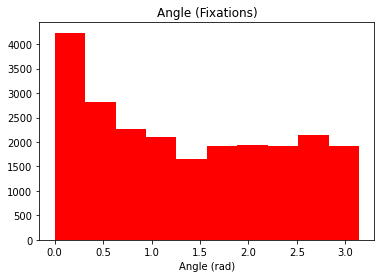

Average Angle: 1.3752285000803213 rad
Standard Deviation: 0.9699820948720608
Skewness: 0.22030843985905726
Kurtosis: -1.2837689713479918


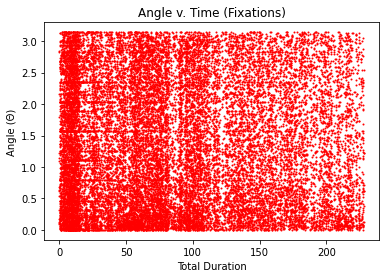

In [71]:
#From https://www.pythonpool.com/numpy-angle/

fix_theta_np = []

ang_time_f2 = []

for i in range(len(fix_disP)-1):
    vec1 = [np.array(x_fixLen[i]).sum(axis=0), np.array(y_fixLen[i]).sum(axis=0)]
    vec2 = [np.array(x_fixLen[i+1]).sum(axis=0), np.array(y_fixLen[i+1]).sum(axis=0)]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        fix_theta_np.append(math.pi - np.arccos(dot_product))
        ang_time_f2.append(fix_timestamp[i+1]/1000000)
        
print(len(fix_theta_np))

plt.hist(fix_theta_np, color = "red")
plt.xlabel("Angle (rad)")
plt.title("Angle (Fixations)")
plt.savefig("Fixations_angle_hist_v2")
plt.show()


f_theta_tot = 0

for j in range (len(fix_theta_np)):
    
    if math.isnan(fix_theta_np[j]):
        pass
    else:
        f_theta_tot = f_theta_tot + fix_theta_np[j]
    
f_theta_avg = f_theta_tot/len(fix_theta_np)

print("Average Angle: " + str(f_theta_avg) + " rad")


f_ang_sd = np.std(fix_theta_np)
print("Standard Deviation: " + str(f_ang_sd))

f_ang_sk = skew(fix_theta_np) #(... ,bias=False)
print("Skewness: " + str(f_ang_sk))

f_ang_ku = kurtosis(fix_theta_np) #(... ,bias=False)
print("Kurtosis: " + str(f_ang_ku))


plt.scatter(ang_time_f2,fix_theta_np,s=1, c = 'red')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Fixations)")
plt.savefig("Fixations_angle_v2")
plt.show()

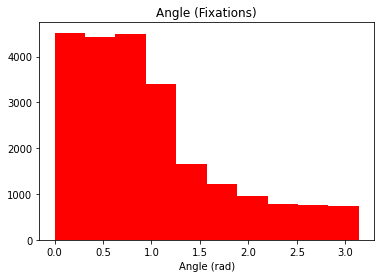

Average Angle: 0.9713522053453691 rad
Standard Deviation: 0.7600814971160843
Skewness: 1.0362027815891317
Kurtosis: 0.37468071151215554


In [72]:
#Angle
    
fix_theta = []

f_numer = []

f_denom = []

ang_time_f = []
    
for i in range(len(fix_disP)-1): 
    
    top = (x_fixLen[i] * y_fixLen[i]) + (x_fixLen[i+1] * y_fixLen[i+1])
    
    bottom = (fix_disP[i] * fix_disP[i+1])
    
    if math.isnan(bottom):
        pass
    elif math.isnan(top):
        pass
    else:
        f_numer.append(top)
        f_denom.append(bottom)
    
for j in range(len(f_numer)):
    
    #print(numer[j]/denom[j])
    if (f_denom[j] == 0):
        pass
    else:
        fix_cos = math.cos(f_numer[j]/f_denom[j])
        fix_theta.append(math.acos(fix_cos))
        ang_time_f.append(fix_timestamp[j+1]/1000000)

plt.hist(fix_theta,  color = "red")
plt.xlabel("Angle (rad)")
plt.title("Angle (Fixations)")
plt.savefig("Fixations_angle_hist_cos")
plt.show()


f_theta_tot = 0

for j in range (len(fix_theta)):
    
    if math.isnan(fix_theta[j]):
        pass
    else:
        f_theta_tot = f_theta_tot + fix_theta[j]
    
f_theta_avg = f_theta_tot/len(fix_theta)

print("Average Angle: " + str(f_theta_avg) + " rad")


f_ang_sd = np.std(fix_theta)
print("Standard Deviation: " + str(f_ang_sd))

f_ang_sk = skew(fix_theta) #(... ,bias=False)
print("Skewness: " + str(f_ang_sk))

f_ang_ku = kurtosis(fix_theta) #(... ,bias=False)
print("Kurtosis: " + str(f_ang_ku))

In [73]:
print(len(ang_time_f))
print(len(fix_theta))

22945
22945


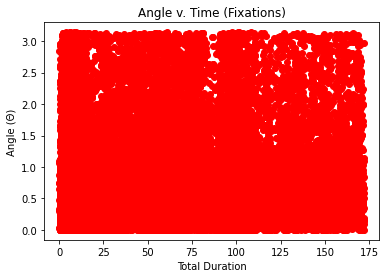

In [74]:
plt.scatter(ang_time_f,fix_theta, c = 'red')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Fixations)")
plt.savefig("Fixations_angle_cos")
plt.show()



In [75]:
print(math.pi)

3.141592653589793


<ipython-input-76-d6428e1f6ab9>:12: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-76-d6428e1f6ab9>:11: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-76-d6428e1f6ab9>:16: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


8867


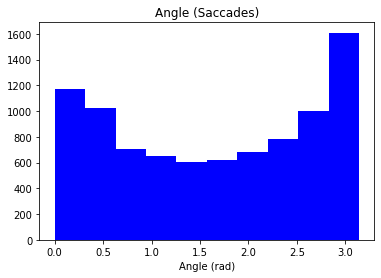

Average Angle: 1.648570577484306 rad
Standard Deviation: 1.0293340824112542
Skewness: -0.08418797767873952
Kurtosis: -1.445592454498408


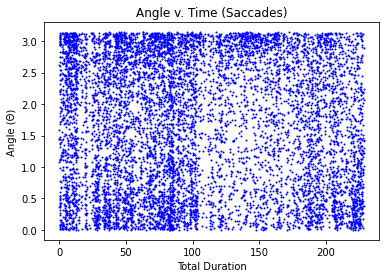

In [76]:
#From https://www.pythonpool.com/numpy-angle/

sac_theta_np = []

ang_time_s2 = []

for i in range(len(sac_disP)-1):
    vec1 = [np.array(x_sacLen[i]).sum(axis=0), np.array(y_sacLen[i]).sum(axis=0)]
    vec2 = [np.array(x_sacLen[i+1]).sum(axis=0), np.array(y_sacLen[i+1]).sum(axis=0)]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        sac_theta_np.append(math.pi - np.arccos(dot_product))
        ang_time_s2.append(sac_timestamp[i]/1000000)
        
print(len(sac_theta_np))

plt.hist(sac_theta_np, color = "blue")
plt.xlabel("Angle (rad)")
plt.title("Angle (Saccades)")
plt.savefig("Saccades_angle_hist_v2")
plt.show()


s_theta_tot = 0

for j in range (len(sac_theta_np)):
    
    if math.isnan(sac_theta_np[j]):
        pass
    else:
        s_theta_tot = s_theta_tot + sac_theta_np[j]
    
s_theta_avg = s_theta_tot/len(sac_theta_np)

print("Average Angle: " + str(s_theta_avg) + " rad")


s_ang_sd = np.std(sac_theta_np)
print("Standard Deviation: " + str(s_ang_sd))

s_ang_sk = skew(sac_theta_np) #(... ,bias=False)
print("Skewness: " + str(s_ang_sk))

s_ang_ku = kurtosis(sac_theta_np) #(... ,bias=False)
print("Kurtosis: " + str(s_ang_ku))


plt.scatter(ang_time_s2,sac_theta_np,s=1, c = 'blue')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Saccades)")
plt.savefig("Saccades_angle_v2")
plt.show()

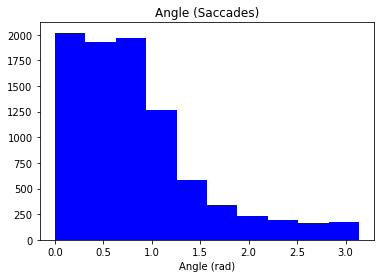

Average Angle: 0.8364021998426471 rad
Standard Deviation: 0.6617834349227986
Skewness: 1.308511369054201
Kurtosis: 1.5858061732123803


In [223]:
#Angle
    
sac_theta = []

s_numer = []

s_denom = []

ang_time_s = []
    
for i in range(len(sac_disP)-1): 
    
    top = (x_sacLen[i] * y_sacLen[i]) + (x_sacLen[i+1] * y_sacLen[i+1])
    
    bottom = (sac_disP[i] * sac_disP[i+1])
    
    if math.isnan(bottom):
        pass
    elif math.isnan(top):
        pass
    else:
        s_numer.append(top)
        s_denom.append(bottom)
    
for j in range(len(s_numer)):
    
    #print(numer[j]/denom[j])
    if (s_denom[j] == 0):
        pass
    else:
        sac_cos = math.cos(s_numer[j]/s_denom[j])
        sac_theta.append(math.acos(sac_cos))
        ang_time_s.append(fix_timestamp[j+1]/1000000)
    
plt.hist(sac_theta, color = "blue")
plt.xlabel("Angle (rad)")
plt.title("Angle (Saccades)")
plt.savefig("Saccades_angle_hist_cos")
plt.show()


s_theta_tot = 0

for j in range (len(sac_theta)):
    
    if math.isnan(sac_theta[j]):
        pass
    else:
        s_theta_tot = s_theta_tot + sac_theta[j]
    
s_theta_avg = s_theta_tot/len(sac_theta)

print("Average Angle: " + str(s_theta_avg) + " rad")


s_ang_sd = np.std(sac_theta)
print("Standard Deviation: " + str(s_ang_sd))

s_ang_sk = skew(sac_theta) #(... ,bias=False)
print("Skewness: " + str(s_ang_sk))

s_ang_ku = kurtosis(sac_theta) #(... ,bias=False)
print("Kurtosis: " + str(s_ang_ku))

In [224]:
print(len(ang_time_s))
print(len(sac_theta))

8869
8869


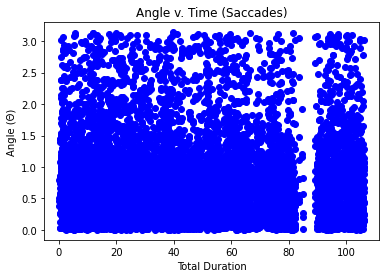

In [225]:
plt.scatter(ang_time_s,sac_theta, c = 'blue')
#plt.xlim(0, 20000)
#plt.ylim(1, 0.01)
plt.xlabel("Total Duration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Time (Saccades)")
plt.savefig("Saccades_angle_sin")
plt.show()

In [226]:
#print(np.array(sac_feat_velo).sum(axis=1))
    
sac_velo_correct = []

for i in range(len(sac_velo)):
    if math.isnan(sac_velo[i]):
        pass
    else:
        sac_velo_correct.append(sac_velo[i])

print(len(sac_velo_correct))

for i in range(380):
    sac_velo_correct.pop(0)

print(len(sac_velo_correct))
#print(len(sac_velo))
print(len(sac_theta))

9249
8869
8869


In [227]:
fix_velo_correct = []

for i in range(len(fix_velo)):
    if math.isnan(fix_velo[i]):
        pass
    else:
        fix_velo_correct.append(fix_velo[i])

print(len(fix_velo_correct))
        
for i in range(1555):
    fix_velo_correct.pop(0)
print(len(fix_velo_correct))
print(len(fix_theta))

#Continue from here...

24500
22945
22945


In [228]:
print(len(fix_theta_np))
for i in range(20):
    fix_velo_correct.pop(0)
print(len(fix_velo_correct))
print(len(sac_theta_np))
for i in range(2):
    sac_velo_correct.pop(0)
print(len(sac_velo_correct))


22925
22925
8867
8867


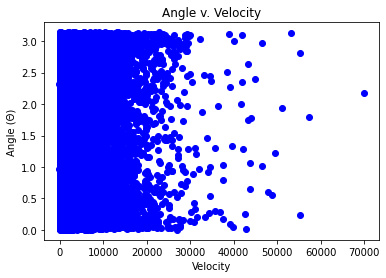

In [229]:
plt.scatter(sac_velo_correct,sac_theta_np, c = 'blue')
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity")
plt.savefig("Angle_Velocity_Sac_np")
plt.show()

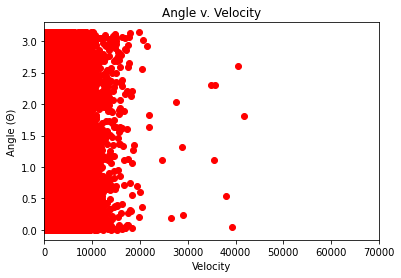

In [230]:
plt.scatter(fix_velo_correct,fix_theta_np, c = 'red')
plt.xlim(0,70000)
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity")
plt.savefig("Angle_Velocity_Fix_np")
plt.show()

In [231]:
sac_accel_correct = []

for i in range(len(sac_accel)):
    if math.isnan(sac_accel[i]):
        pass
    else:
        sac_accel_correct.append(sac_accel[i])


print(len(sac_accel))
print(len(sac_accel_correct))
for i in range(88):
    sac_accel_correct.pop(0)
print(len(sac_accel_correct))
print(len(sac_theta))



9969
8957
8869
8869


In [232]:
fix_accel_correct = []

for i in range(len(fix_accel)):
    if math.isnan(fix_accel[i]):
        pass
    else:
        fix_accel_correct.append(fix_accel[i])


print(len(fix_accel))
print(len(fix_accel_correct))
for i in range(557):
    fix_accel_correct.pop(0)
print(len(fix_accel_correct))
print(len(fix_theta))

26695
23502
22945
22945


In [233]:
print(len(fix_theta_np))
for i in range(20):
    fix_accel_correct.pop(0)

print(len(fix_accel_correct))
print(len(sac_theta_np))
for i in range(2):
    sac_accel_correct.pop(0)
print(len(sac_accel_correct))

22925
22925
8867
8867


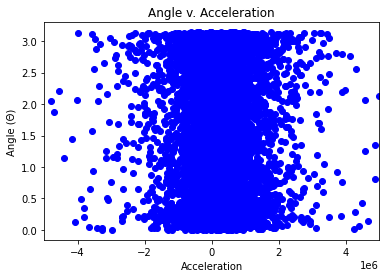

In [234]:
plt.scatter(sac_accel_correct,sac_theta_np, c = 'blue')
plt.xlim(-5000000,5000000)
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration")
plt.savefig("Angle_Acceleration_Sac_np")
plt.show()

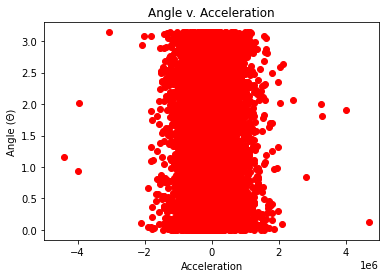

In [235]:
plt.scatter(fix_accel_correct,fix_theta_np, c = 'red')
plt.xlim(-5000000,5000000)
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration")
plt.savefig("Angle_Acceleration_Fix_np")
plt.show()

In [94]:
#print(len(sac_accel_correct))

print(len(sac_accel_correct))
print(len(sac_velo_correct))
#sac_velo.pop(0)
print(len(fix_accel_correct))
print(len(fix_velo_correct))

for i in range(292):
    sac_velo_correct.pop(0)
    
for i in range(998):
    fix_velo_correct.pop(0)

print(len(sac_velo_correct))
print(len(fix_velo_correct))    
#print(len(fix_velo))

8957
9249
23502
24500
8957
23502


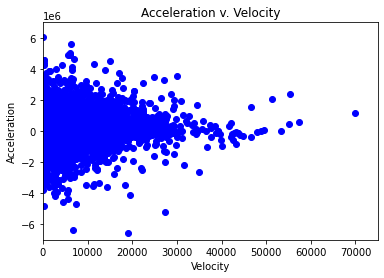

In [102]:
plt.scatter(sac_velo_correct,sac_accel_correct, c = 'blue')
plt.ylim(-7000000,7000000)
plt.xlim(-0.001,75000)
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity")
plt.savefig("Acceleration_Velocity_Sac_v2")
plt.show()

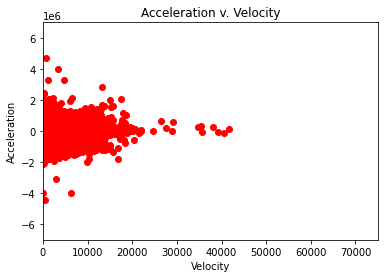

In [103]:
plt.scatter(fix_velo_correct,fix_accel_correct, c = 'red')
plt.ylim(-7000000,7000000)
plt.xlim(-0.001,75000)
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity")
plt.savefig("Acceleration_Velocity_Fix_v2")
plt.show()

In [152]:
fix_feat_theta_avg.pop(0)
print(len(fix_feat_theta_avg))
sac_feat_theta_avg.pop(0)
print(len(sac_feat_theta_avg))
fix_feat_velo.pop(0)
print(len(fix_feat_velo))
sac_feat_velo.pop(0)
print(len(sac_feat_velo))
print(len(fix_feat_accel))
print(len(sac_feat_accel))

324
809
324
809
324
809


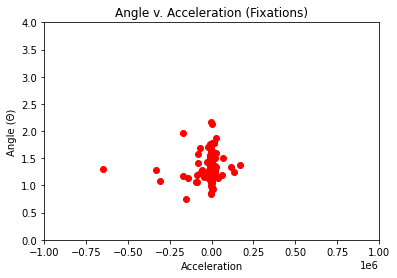

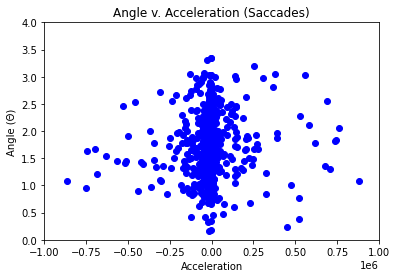

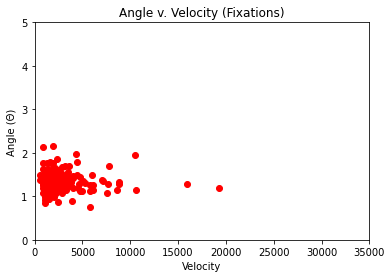

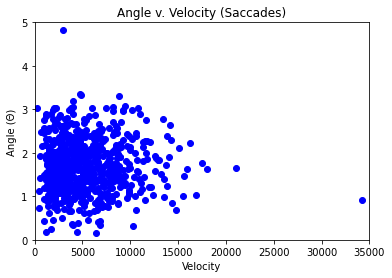

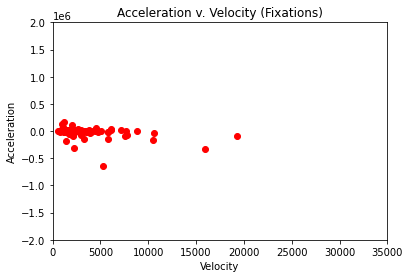

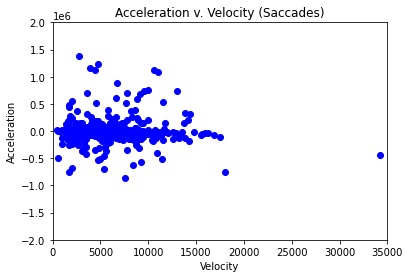

In [162]:
plt.scatter(fix_feat_accel,fix_feat_theta_avg, c = 'red')
plt.xlim(-1000000,1000000)
plt.ylim(0,4)
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration (Fixations)")
plt.savefig("Angle_Acceleration_Feat_Fix")
plt.show()

plt.scatter(sac_feat_accel,sac_feat_theta_avg, c = 'blue')
plt.xlim(-1000000,1000000)
plt.ylim(0,4)
plt.xlabel("Acceleration")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Acceleration (Saccades)")
plt.savefig("Angle_Acceleration_Feat_Sac")
plt.show()

plt.scatter(fix_feat_velo,fix_feat_theta_avg, c = 'red')
plt.xlim(0,35000)
plt.ylim(0,5)
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity (Fixations)")
plt.savefig("Angle_Velocity_Feat_Fix")
plt.show()

plt.scatter(sac_feat_velo,sac_feat_theta_avg, c = 'blue')
plt.xlim(0,35000)
plt.ylim(0,5)
plt.xlabel("Velocity")
plt.ylabel("Angle (Θ)")
plt.title("Angle v. Velocity (Saccades)")
plt.savefig("Angle_Velocity_Feat_Sac")
plt.show()

plt.scatter(fix_feat_velo,fix_feat_accel, c = 'red')
plt.ylim(-2000000,2000000)
plt.xlim(0,35000)
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity (Fixations)")
plt.savefig("Acceleration_Velocity_Feat_Fix")
plt.show()

plt.scatter(sac_feat_velo,sac_feat_accel, c = 'blue')
plt.ylim(-2000000,2000000)
plt.xlim(0,35000)
plt.xlabel("Velocity")
plt.ylabel("Acceleration")
plt.title("Acceleration v. Velocity (Saccades)")
plt.savefig("Acceleration_Velocity_Feat_Sac")
plt.show()